# Ride-Hailing Subscription Service

This notebook delves into the decision-making process for a ride-hailing company offering a subscription model where customers pay a fixed monthly fee for priority booking, ride credits, and exclusive discounts. We will leverage the following:
* [Decision trees](https://en.wikipedia.org/wiki/Decision_tree) (do not confuse with [classification trees](https://en.wikipedia.org/wiki/Decision_tree_learning)).
* [Influence diagrams](https://en.wikipedia.org/wiki/Influence_diagram).

#### Table of contents:

1. Framing the decision problem

2. Quantifying the decision problem

3. Modelling the problem with a decision tree

4. Modelling the problem with an influence diagram

5. Solving the influence diagram

## 1 - Framing the decision problem

A ride-hailing company, similar to Uber, offers a subscription model where customers pay a fixed monthly fee for priority booking, ride credits, and exclusive discounts. The company has commissioned a market study to compare its pricing and services with those of competitors in the region. The results indicate that if the company does not improve its service quality or pricing, many of its current customers will switch to other ride-hailing companies.

In response, the company prepares a special offer to retain its existing subscribers, offering additional ride credits, discounts, or priority access to drivers as incentives to stay with the service. The company’s manager must decide whether to implement the offer and, if so, how to structure it.

<table>
<tr>
  <td>
    <img src="./images/ride_hailing.jpg" alt="Ride-hailing" width="500">
  </td>
</tr>
<tr>
<i><b>Figure 1.</b> Ride-hailing. (<a href="https://retiba.com/academy/market-research/ride-hailing/">image source</a>)</i>
</tr>
</table>

We assume that the cost of making the offer is negligible, and that the company neither gains nor loses anything if a customer joins or leaves the service.

The company categorizes its customers into two groups:

* **Good Customer**: Customers who use the service regularly, take longer rides, and spend a significant amount on each ride, contributing positively to the company’s profits.

* **Bad Customer**: Customers who use the service infrequently, request short rides, or take advantage of promotional offers without generating consistent revenue for the company.

85% of the company’s customers are considered good customers, using the service frequently for longer rides, which generates steady revenue.

15% of customers are considered bad customers, who tend to request short or low-fare rides and frequently utilize discounts and promotions. These customers contribute less revenue and incur higher operational costs for the company.

The company decides to offer an exclusive deal to retain its current customers, hoping to prevent them from switching to competitors.

* For good customers, if an offer is made, there is an 85% chance that the customer will be retained, whereas without an offer, 75% of good customers will remain.
* For bad customers, 90% will be retained if an offer is made, while without an offer, 85% are likely to leave.

A retained good customer generates a net income of €100, while a retained bad customer results in a loss of €850.

## 2 - Quantifying the decision problem

### 2.1 - The utility table (<span style="color: blue">U</span>)

The utility reflects the desirability of a particular scenario. There are various ways to define utilities; in this case, we use the monetary values explicitly provided in the problem statement.

The utility variable <span style="color: blue">U</span> is directly influenced only by <span style="color: purple">R</span> and <span style="color: purple">T</span>.

<table>
  <tr>
    <th><span style="color: purple">R</span></th>
    <th><span style="color: purple">T</span></th>
    <th><span style="color: blue">U</span></th>
  </tr>
  <tr>
    <td rowspan="2">stay</td>
    <td>good</td>
    <td>100</td>
  </tr>
  <tr>
    <td>bad</td>
    <td>-850</td>
  </tr>
  <tr>
    <td rowspan="2">leave</td>
    <td>good</td>
    <td>0</td>
  </tr>
  <tr>
    <td>bad</td>
    <td>0</td>
  </tr>
</table>

### 2.2 - Prior probability of being a good/bad customer (<span style="color: purple">T</span>)

We name this variable "customer type" (<span style="color: purple">T</span>).

<table>
  <tr>
    <th colspan="2">P(<span style="color: purple">T</span>)</th>
  </tr>
  <tr>
    <td>good</td>
    <td>0.9</td>
  </tr>
  <tr>
    <td>bad</td>
    <td>0.1</td>
  </tr>
</table>

### 2.3 - Conditional probability of customer's retention (<span style="color: purple">R</span> | <span style="color: purple">T</span>, <span style="color: red">O</span>)

<span style="color: purple">R</span> represents the retention of a customer and is conditioned on both the type of customer (<span style="color: purple">T</span>) and whether an offer (<span style="color: red">O</span>) is made.

If an offer (<span style="color: red">O</span> = yes) is made, **85% of good customers** will stay, while **90% of bad customers** will be retained.

<table>
  <tr>
    <th>P(<span style="color: purple">R</span> | <span style="color: purple">T</span>, <span style="color: red">O</span> = offer)</th>
    <th>good</th>
    <th>bad</th>   
  </tr>
  <tr>
    <td>stay</td>
    <td>0.85</td>
    <td>0.90</td>     
  </tr>
  <tr>
    <td>leave</td>
    <td>0.15</td>
    <td>0.10</td>
  </tr>
</table>

If no offer is made (<span style="color: red">O</span> = not), **75% of good customers** will remain, whereas **85% of bad customers** will leave.

<table>
  <tr>
    <th>P(<span style="color: purple">R</span> | <span style="color: purple">T</span>, <span style="color: red">O</span> = no)</th>
    <th>good</th>
    <th>bad</th>   
  </tr>
  <tr>
    <td>stay</td>
    <td>0.75</td>
    <td>0.15</td>     
  </tr>
  <tr>
    <td>leave</td>
    <td>0.25</td>
    <td>0.85</td>
  </tr>
</table>

## 3 - Modelling the problem with a decision tree

<table>
<tr>
  <td>
    <img src="./images/ride_hailing_decision_tree.png" alt="Ride-hailing decision tree" width="350">
  </td>
</tr>
<tr>
<i><b>Figure 2.</b> Ride-hailing decision tree </i>
</tr>
</table>

## 4 - Modelling the problem with an influence diagram

<table>
<tr>
  <td>
    <img src="./images/ride_hailing_influence_diagram.png" alt="Ride-hailing influence diagram" width="200">
  </td>
</tr>
<tr>
<i><b>Figure 3.</b> Ride-hailing influence diagram.</i>
</tr>
</table>

### 4.1 - Implementation with PyAgrum

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum as grum
import numpy as np
from pyAgrum import InfluenceDiagram

In [3]:
influence_diagram = InfluenceDiagram()

T = influence_diagram.addChanceNode(grum.LabelizedVariable("T", "T", 0).addLabel('good').addLabel('bad'))
R = influence_diagram.addChanceNode(grum.LabelizedVariable("R", "R", 0).addLabel('stay').addLabel('leave'))
O = influence_diagram.addDecisionNode(grum.LabelizedVariable("O", "O", 0).addLabel('make_offer').addLabel('no_offer'))
U = influence_diagram.addUtilityNode(grum.LabelizedVariable("U", "U", 0).addLabel('utility'))

influence_diagram.addArc("T", "R")
influence_diagram.addArc("O", "R")
influence_diagram.addArc("T", "U")
influence_diagram.addArc("R", "U")

gnb.sideBySide(influence_diagram, captions=["Ride-hailing field influence diagram"])

G <!-- T --> T T <!-- R --> R R <!-- T->R --> T->R <!-- U --> U U <!-- T->U --> T->U <!-- R->U --> R->U <!-- O --> O O <!-- O->R --> O->R Ride-hailing field influence diagram


In [4]:
influence_diagram.cpt(T)[:]=[0.9, 0.1]

influence_diagram.cpt(R)[{"T": "good", "O": "make_offer"}]=[0.85, 0.15] # R: stay, leave
influence_diagram.cpt(R)[{"T": "good", "O": "no_offer"}]=[0.75, 0.25]
influence_diagram.cpt(R)[{"T": "bad", "O": "make_offer"}]=[0.90, 0.10]
influence_diagram.cpt(R)[{"T": "bad", "O": "no_offer"}]=[0.15, 0.85]

# We can also use np.array for easier assignment
influence_diagram.utility(U)[{"R": "stay"}]=np.array([100, -850])[:, np.newaxis] # T: good, bad
influence_diagram.utility(U)[{"R": "leave"}]=np.array([0, 0])[:, np.newaxis]

In [5]:
gnb.showPotential(influence_diagram.cpt(T))
gnb.showPotential(influence_diagram.cpt(R))
gnb.showPotential(influence_diagram.utility(U))

## 5 - Solving the influence diagram

Once the influence diagram is built, we can use inference algorithms to determine the optimal decision strategy that maximizes expected utility, given the uncertainties and dependencies present in the model.

The Shenoy-Shafer algorithm offers several advantages over other methods:

* Unified treatment of probabilities and utilities.
* Local computation approach.
* Flexibility in variable elimination.
* Modularity.
* Efficiency in handling LIMIDs.
* Reduced computational complexity.

[PyAgrum features an implementation of the Shenoy-Shafer algorithm tailored for LIMIDs through the `ShaferShenoyLIMIDInference` class.](https://pyagrum.readthedocs.io/en/latest/influenceDiagram.html#pyAgrum.ShaferShenoyLIMIDInference)

### 5.1 - Implementation with PyAgrum

In [6]:
inference_engine = gum.ShaferShenoyLIMIDInference(influence_diagram)
inference_engine.makeInference()

print(f"Is the diagram solvable?: {inference_engine.isSolvable()}")

Is the diagram solvable?: True


We can now estimate the optimal decision path:

* **Should we make this offer to our clients** (given the uncertainty)?

In [11]:
inference_engine.optimalDecision("O")

(pyAgrum.Potential@0x600001971040) 
  O                |
make_offe|no_offer |
---------|---------|
 0.0000  | 1.0000  |

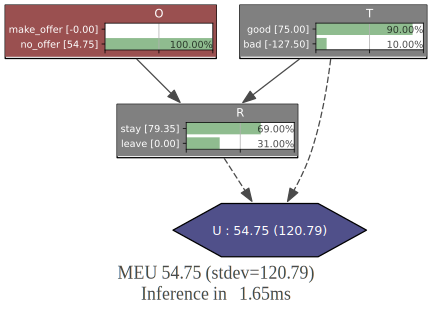

In [9]:
gnb.showInference(influence_diagram,engine=inference_engine,size="6!")

In [16]:
inference_engine.posteriorUtility(O)

(pyAgrum.Potential@0x600003a5ca28) 
  O                |
make_offe|no_offer |
---------|---------|
 -0.0000 | 54.7500 |